In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

### Lets learn about quarto

- For this purpose of we will be looking at the Titanic Dataset from Kaggle

### Step 1: Exploratory Data Analysis (EDA)

1. **Understand the Dataset:**
   - **PassengerId:** Unique identifier for each passenger.
   - **Pclass:** Passenger class (1st, 2nd, 3rd).
   - **Name:** Name of the passenger.
   - **Sex:** Gender of the passenger.
   - **Age:** Age of the passenger.
   - **SibSp:** Number of siblings or spouses aboard.
   - **Parch:** Number of parents or children aboard.
   - **Ticket:** Ticket number (appears to be a UUID here).
   - **Fare:** Ticket fare.
   - **Embarked:** Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).
   - **Survived:** Survival indicator (0 = No, 1 = Yes).

2. **Initial Inspection:**
   - **Check for missing values.**
   - **Inspect data types.**
   - **Describe the distribution of numeric features.**
   - **Visualize the categorical features (Pclass, Sex, Embarked, Survived).**

3. **Detailed Analysis:**
   - **Analyze survival rate across different features.**
   - **Visualize the correlation between numerical features (Age, SibSp, Parch, Fare).**
   - **Analyze any notable patterns (e.g., survival rate vs. fare, age, Pclass).**

In [9]:
titanic_df=pd.read_csv('Titanic.csv')
titanic_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,Allison Hill,male,17,4,2,43d75413-a939-4bd1-a516-b0d47d3572cc,144.08,Q,1
1,2,1,Noah Rhodes,male,60,2,2,6334fa2a-8b4b-47e7-a451-5ae01754bf08,249.04,S,0
2,3,3,Angie Henderson,male,64,0,0,61a66444-e2af-4629-9efb-336e2f546033,50.31,Q,1
3,4,3,Daniel Wagner,male,35,4,0,0b6c03c8-721e-4419-afc3-e6495e911b91,235.20,C,1
4,5,1,Cristian Santos,female,70,0,3,436e3c49-770e-49db-b092-d40143675d58,160.17,C,1


In [10]:
eda_info = {
    "Missing Values": titanic_df.isnull().sum(),
    "Data Types": titanic_df.dtypes
}
eda_info

{'Missing Values': PassengerId    0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Embarked       0
 Survived       0
 dtype: int64,
 'Data Types': PassengerId      int64
 Pclass           int64
 Name            object
 Sex             object
 Age              int64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Embarked        object
 Survived         int64
 dtype: object}

In [11]:
titanic_df.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
count,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000,1000.000000
unique,NaN,NaN,995,2,NaN,NaN,NaN,1000,NaN,3,NaN
top,NaN,NaN,Michael Miller,male,NaN,NaN,NaN,43d75413-a939-4bd1-a516-b0d47d3572cc,NaN,Q,NaN
freq,NaN,NaN,2,527,NaN,NaN,NaN,1,NaN,362,NaN
mean,500.500000,1.964000,NaN,NaN,38.458000,2.032000,2.005000,NaN,247.968650,NaN,0.492000
std,288.819436,0.820596,NaN,NaN,23.103723,1.424431,1.410306,NaN,139.301211,NaN,0.500186
min,1.000000,1.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN,10.020000,NaN,0.000000
25%,250.750000,1.000000,NaN,NaN,19.000000,1.000000,1.000000,NaN,126.295000,NaN,0.000000
50%,500.500000,2.000000,NaN,NaN,36.500000,2.000000,2.000000,NaN,246.500000,NaN,0.000000
75%,750.250000,3.000000,NaN,NaN,59.000000,3.000000,3.000000,NaN,365.662500,NaN,1.000000


### Left Plot: Survival Count by Sex
- **Categories:** The plot distinguishes between male and female passengers.
- **Bars:**
  - Blue bars represent the count of passengers who did **not** survive (`Survived = 0`).
  - Orange bars represent the count of passengers who survived (`Survived = 1`).
- **Observations:**
  - The survival rate is relatively balanced between males and females, with a slightly higher count of non-survivors among males compared to females.
  - However, the difference between survivors and non-survivors is not very large, indicating that sex alone might not be a strong predictor of survival in this dataset.

### Right Plot: Survival Count by Class
- **Categories:** The plot shows the three passenger classes: 1st, 2nd, and 3rd.
- **Bars:**
  - Blue bars represent the count of passengers who did **not** survive.
  - Orange bars represent the count of passengers who survived.
- **Observations:**
  - There is a noticeable trend where 1st class passengers have a higher survival rate than 2nd and 3rd class passengers. The survival rates for 2nd and 3rd classes appear to be lower.
  - The number of non-survivors is generally higher in the lower classes (2nd and 3rd), which might suggest that class is an important factor in determining survival.

### Summary:
- **Sex:** The survival rates between males and females are somewhat balanced, but males have a slightly higher count of non-survivors.
- **Class:** There is a clear trend that shows higher survival rates in 1st class compared to 2nd and 3rd classes, suggesting that being in a higher class might have increased a passenger's chance of survival.

These observations can be used to inform feature selection or engineering when building a predictive model for survival, as passenger class appears to have a more pronounced effect than sex.

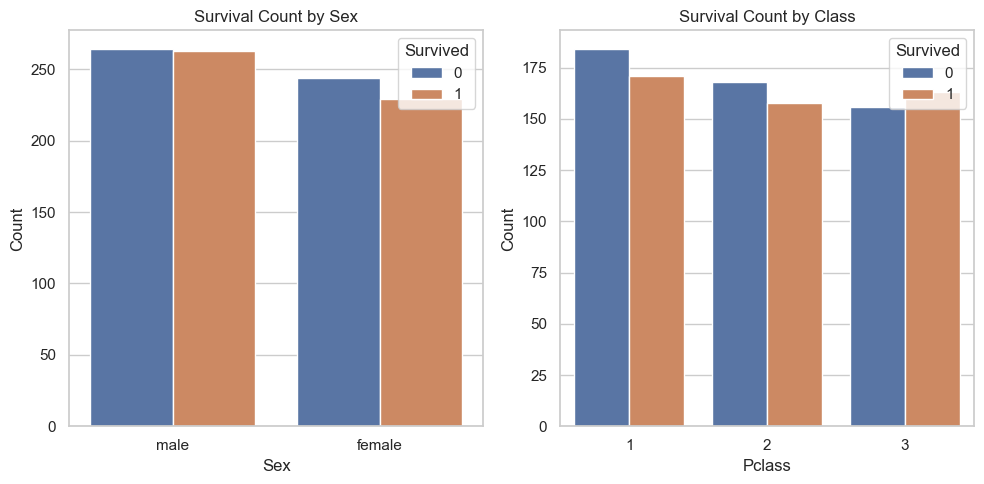

In [12]:
# Set plot style
sns.set(style="whitegrid")

# Plotting the count of survivors by sex
plt.figure(figsize=(10, 5))

# Survival rate by sex
plt.subplot(1, 2, 1)
sns.countplot(data=titanic_df, x="Sex", hue="Survived")
plt.title("Survival Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")

# Survival rate by class
plt.subplot(1, 2, 2)
sns.countplot(data=titanic_df, x="Pclass", hue="Survived")
plt.title("Survival Count by Class")
plt.xlabel("Pclass")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

### Step 2: Machine Learning Model

1. **Preprocessing:**
   - **Handle missing values, if any.**
   - **Convert categorical variables into numerical ones (e.g., Sex, Embarked).**
   - **Feature scaling (if necessary).**
   - **Split the data into training and testing sets.**

2. **Model Selection:**
   - **Try different models like Logistic Regression, Random Forest, and Support Vector Machine (SVM).**
   - **Use cross-validation to evaluate model performance.**
   - **Check accuracy, precision, recall, and F1-score.**

3. **Model Evaluation:**
   - **Analyze the confusion matrix.**
   - **Evaluate the model on the test set.**
   - **Perform feature importance analysis if using tree-based models.**

### Confusion Matrix

The confusion matrix is:
```
[[55, 51],
 [49, 45]]
```

- **True Negatives (TN):** 55
  - The model correctly predicted 55 instances where the actual class was 0 (did not survive).
- **False Positives (FP):** 51
  - The model incorrectly predicted 51 instances as class 1 (survived) when the actual class was 0.
- **False Negatives (FN):** 49
  - The model incorrectly predicted 49 instances as class 0 (did not survive) when the actual class was 1.
- **True Positives (TP):** 45
  - The model correctly predicted 45 instances where the actual class was 1 (survived).

### Classification Report

The classification report provides precision, recall, and F1-score for each class (0 and 1):

1. **Class 0 (Did Not Survive):**
   - **Precision:** 0.53
     - Of all instances predicted as class 0, 53% were correctly identified (55 out of 106).
   - **Recall:** 0.52
     - Of all actual class 0 instances, the model correctly identified 52% (55 out of 106).
   - **F1-score:** 0.52
     - The harmonic mean of precision and recall, representing the balance between precision and recall.

2. **Class 1 (Survived):**
   - **Precision:** 0.47
     - Of all instances predicted as class 1, 47% were correctly identified (45 out of 94).
   - **Recall:** 0.48
     - Of all actual class 1 instances, the model correctly identified 48% (45 out of 94).
   - **F1-score:** 0.47
     - The harmonic mean of precision and recall, representing the balance between precision and recall.

### Overall Metrics

- **Accuracy:** 0.50
  - The model correctly classified 50% of the total instances (100 out of 200).
- **Macro Avg:**
  - **Precision, Recall, F1-score:** 0.50 each, indicating the average performance across both classes.
- **Weighted Avg:**
  - The weighted average precision, recall, and F1-score are also 0.50, taking into account the support (number of actual instances) for each class.

### Summary:
- The model's performance is mediocre, with accuracy around 50%, meaning it is only slightly better than random guessing.
- The precision and recall values for both classes are close to each other but not high, indicating the model struggles to distinguish between the two classes effectively.
- The model's F1-scores, which balance precision and recall, are also around 0.50 for both classes, reflecting the overall mediocre performance.

This could suggest that the model may need more tuning, better features, or additional data to improve its ability to accurately predict survival.

In [13]:
# Preprocessing
# Convert categorical variables into numerical ones
le_sex = LabelEncoder()
titanic_df['Sex'] = le_sex.fit_transform(titanic_df['Sex'])

le_embarked = LabelEncoder()
titanic_df['Embarked'] = le_embarked.fit_transform(titanic_df['Embarked'])

# Features and target variable
X = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y = titanic_df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)

# Generate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

conf_matrix

array([[55, 51],
       [49, 45]])

In [14]:
print(class_report)

              precision    recall  f1-score   support

           0       0.53      0.52      0.52       106
           1       0.47      0.48      0.47        94

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200



### Now that we have a notebook lets render this as a quarto doc
use command 
```
quarto convert jupyter_notebook.ipynb -o output_file.qmd
```